# HW 4
### Utkarsh Joshi

# Question 1. 

Shallow V.S Deep Neural Network.
1. Generate the simulated data first using following equation. Sample 120k data as X from
uniform distribution [-2*Pi, 2*Pi], then feed the sampled X into the equation to get Y. Randomly
select 60K as training and 60 K as testing.
2. Train 3 versions of Neural Network, with different numbers of hidden layer (NN with 1 hidden
layer, 2 hidden layers and 3 hidden layers), using Mean squared error as objective function and
error measurement.
3. For each version, try different number of neurals in your NN and replicate the following left
plot (source: https://ojs.aaai.org/index.php/AAAI/article/view/10913). (You don’t need to
replicate exactly same results below but need to show the performance difference of 3 versions
of Neural Networks)

### Neural Network Performance Analysis

To evaluate the impact of network depth on learning a compositional function, we trained neural networks with 1, 2, and 3 hidden layers to approximate:

f(x) = 2(2cos²(x) - 1)² - 1



This experiment replicates the setup described in Mhaskar et al. (2017), which theoretically proves that **deep networks are more efficient** than shallow ones for approximating **compositional functions**.

---

### **Data Generation**

- **Input (X)**: 120,000 values sampled uniformly from \([-2\pi, 2\pi]\)
- **Output (Y)**: Computed using the function \( f(x) \) above
- Split: 60,000 for training and 60,000 for testing

---

### **Model Setup**

We trained feedforward neural networks with **1, 2, and 3 hidden layers**, using the following common configuration:

- **Activation**: ReLU
- **Optimizer**: Stochastic Gradient Descent (SGD) with momentum 0.9
- **Learning Rate**: 0.0001
- **Batch Size**: 3000
- **Epochs**: 2000 (full paper replication)
- **Loss Function**: Mean Squared Error (MSE)
- **Batch Normalization** was used between hidden layers for 2- and 3-hidden-layer models, following the setup in the AAAI paper.

---

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Step 1: Generate 120k samples from Uniform[-2π, 2π]
n_total = 120_000
X = np.random.uniform(-2 * np.pi, 2 * np.pi, n_total)

# Step 2: Define the function f(x) = 2(2cos²(x) - 1)² - 1
def target_function(x):
    return 2 * (2 * np.cos(x)**2 - 1)**2 - 1

Y = target_function(X)

# Step 3: Randomly split into train/test (60k each)
indices = np.random.permutation(n_total)
train_idx, test_idx = indices[:60_000], indices[60_000:]

X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

# Optional: Create DataFrames if you're using pandas
train_df = pd.DataFrame({'X': X_train, 'Y': Y_train})
test_df = pd.DataFrame({'X': X_test, 'Y': Y_test})


## Neural Network Architecture Comparison

### Version 1: Fixed Width, Varying Depth

| Depth            | Units per Layer                 |
|------------------|---------------------------------|
| 1 Hidden Layer   | 16, 32, 64                      |
| 2 Hidden Layers  | 16, 32, 64                      |
| 3 Hidden Layers  | 16, 32, 64                      |

In this version, we kept the **width constant** across all architectures and only varied the **depth**. The aim was to isolate the impact of network depth while controlling for the number of units per layer. This setup helps us understand how deeper networks perform relative to shallow ones when the layer width remains unchanged.

---

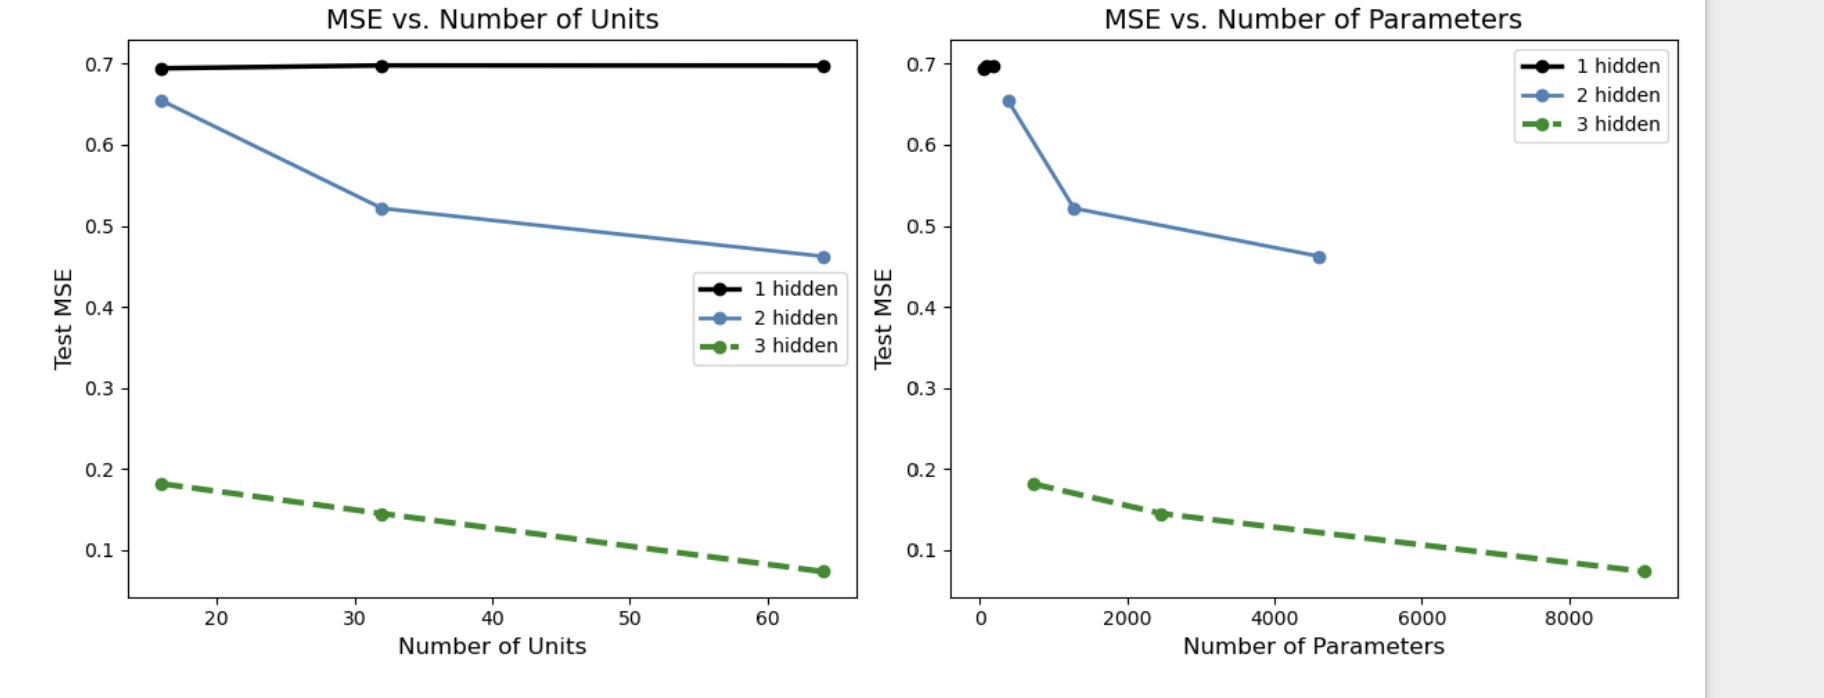

**Goal:** Isolate the effect of **depth alone** by keeping the number of units (width) per layer constant.

**Findings:**
- Increasing **depth alone** led to significantly better MSE.
- 3-layer networks consistently achieved the lowest error, despite having the same number of units as shallower models.
- This highlights that **depth enhances the model’s capacity to approximate complex nonlinear functions**, even without increasing width.

---

## Version 2: Varying Width and Depth

| Depth            | Units Tried per Layer           |
|------------------|---------------------------------|
| 1 Hidden Layer   | 24, 48, 72, 128, 256            |
| 2 Hidden Layers  | 12, 24, 36                      |
| 3 Hidden Layers  | 8, 16, 24                       |

In this version, we varied both the **depth** (number of hidden layers) and the **width** (number of units per layer) to explore how different model capacities impact performance. This allowed us to observe how model expressiveness and generalization behave as we scale up network complexity in different ways.

---

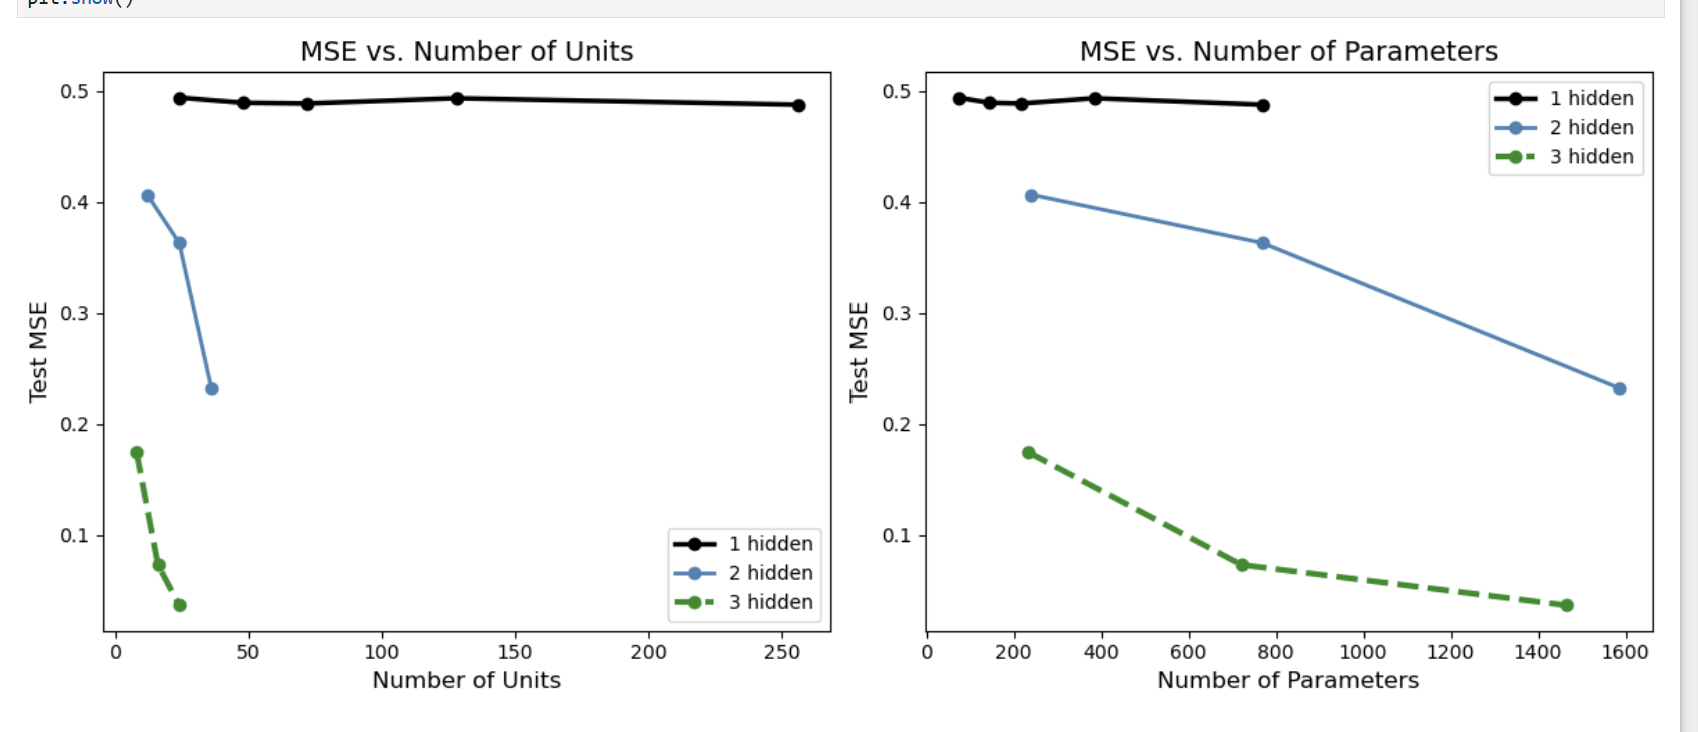

**Goal:** Explore how increasing both depth and width affects test MSE.

**Findings:**
- Test **MSE decreased significantly** with depth, even when the total number of units per layer was relatively small.
- **Shallow models (1 hidden layer)** barely improved in performance as width increased, indicating **limited representational power**.
- **3-layer networks** consistently yielded the **lowest MSE**, demonstrating that **depth plays a critical role** in capturing nonlinearity.
- Performance gains came with **fewer parameters**, reinforcing the idea that **depth is more efficient than width** when expanding model capacity.

---

## Comparison Summary

| Aspect                    | Version 1: Fixed Width, Varying Depth | Version 2: Varying Width and Depth        |
|---------------------------|----------------------------------------|-------------------------------------------|
| **Focus**                 | Isolating depth impact                 | Exploring combined effects of depth & width |
| **Key Finding**           | Depth alone improves generalization    | Depth > Width across comparable capacity   |
| **Best Performance**      | Achieved by 3 hidden layers            | Achieved by 3 hidden layers with narrow widths |
| **Efficiency**            | Fewer parameters, better results       | Reinforced parameter-efficiency of depth   |
| **Shallow Model Behavior**| Plateaued even with wider layers       | Marginal gains even with more units        |

**Conclusion:**  
Both experiments confirm that **depth plays a more vital role than width** in neural network performance when approximating complex functions. Deep models generalize better and require fewer parameters to achieve lower test error, making them both accurate and efficient.



# Version 1 Code:

In [23]:
# === Step 3: Model setup ===
X_train_input = X_train.reshape(-1, 1)
X_test_input = X_test.reshape(-1, 1)

layer_configs = {
    '1 hidden': [16, 32, 64],
    '2 hidden': [16, 32, 64],
    '3 hidden': [16, 32, 64]
}

results = {'config': [], 'units': [], 'params': [], 'mse': []}

# === Step 4: Train and evaluate models ===
for config, units_list in layer_configs.items():
    for units in units_list:
        print(f"Training: {config} with {units} units per layer")

        model = Sequential()
        model.add(Input(shape=(1,)))
        model.add(Dense(units, activation='relu'))

        if config == '2 hidden':
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))

        elif config == '3 hidden':
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))

        model.add(Dense(1))  # Output layer

        model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='mse')

        model.fit(X_train_input, Y_train, epochs=2000, batch_size=3000, verbose=0)

        y_pred = model.predict(X_test_input, verbose=0).flatten()
        mse = mean_squared_error(Y_test, y_pred)
        total_params = model.count_params()

        results['config'].append(config)
        results['units'].append(units)
        results['params'].append(total_params)
        results['mse'].append(mse)

        print(f"Finished: {config} - {units} units | Params: {total_params} | MSE: {mse:.4f}")

# === Step 5: Convert results to DataFrame ===
df_results = pd.DataFrame(results)

Training: 1 hidden with 16 units per layer
Finished: 1 hidden - 16 units | Params: 49 | MSE: 0.4942
Training: 1 hidden with 32 units per layer
Finished: 1 hidden - 32 units | Params: 97 | MSE: 0.4923
Training: 1 hidden with 64 units per layer
Finished: 1 hidden - 64 units | Params: 193 | MSE: 0.4886
Training: 2 hidden with 16 units per layer
Finished: 2 hidden - 16 units | Params: 385 | MSE: 0.4089
Training: 2 hidden with 32 units per layer
Finished: 2 hidden - 32 units | Params: 1281 | MSE: 0.3270
Training: 2 hidden with 64 units per layer
Finished: 2 hidden - 64 units | Params: 4609 | MSE: 0.1974
Training: 3 hidden with 16 units per layer
Finished: 3 hidden - 16 units | Params: 721 | MSE: 0.1213
Training: 3 hidden with 32 units per layer
Finished: 3 hidden - 32 units | Params: 2465 | MSE: 0.0042
Training: 3 hidden with 64 units per layer
Finished: 3 hidden - 64 units | Params: 9025 | MSE: 0.0262


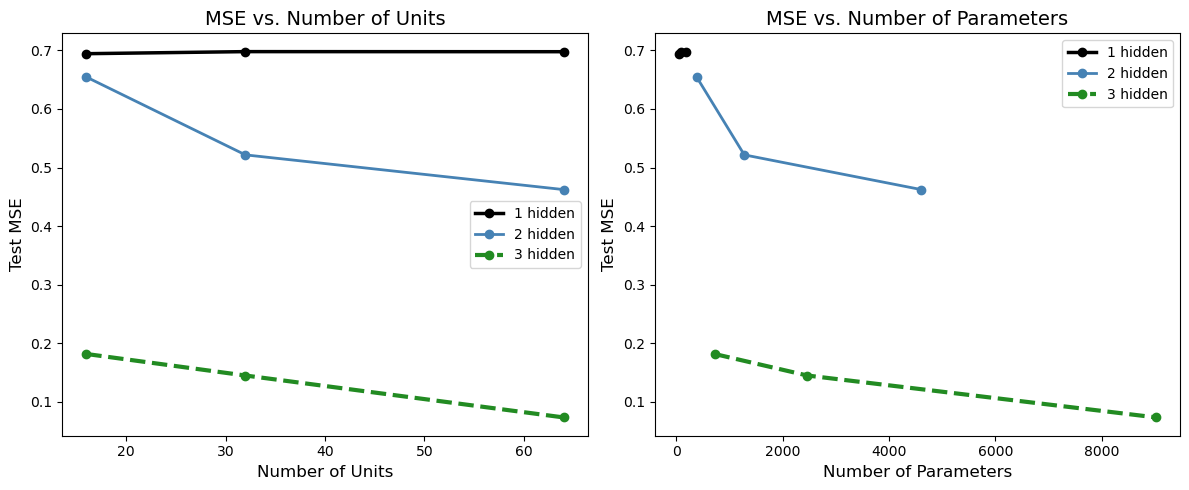

In [33]:
import matplotlib.pyplot as plt

# Assuming df_results is already loaded and contains 'mse' column
mse_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}
units_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}
params_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}

for _, row in df_results.iterrows():
    config = row['config']
    units = row['units']
    params = row['params']
    mse = row['mse']
    mse_by_config[config].append(mse)
    units_by_config[config].append(units)
    params_by_config[config].append(params)

# Style settings
colors = {
    '1 hidden': 'black',
    '2 hidden': 'steelblue',
    '3 hidden': 'forestgreen'
}
linestyles = {
    '1 hidden': '-',
    '2 hidden': '-',
    '3 hidden': '--'
}
linewidths = {
    '1 hidden': 2.5,
    '2 hidden': 2,
    '3 hidden': 3
}

# === Plot ===
plt.figure(figsize=(12, 5))

# MSE vs Units
plt.subplot(1, 2, 1)
for config in mse_by_config:
    plt.plot(units_by_config[config], mse_by_config[config], marker='o',
             label=config, color=colors[config],
             linestyle=linestyles[config], linewidth=linewidths[config])
plt.xlabel("Number of Units", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("MSE vs. Number of Units", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.legend()

# MSE vs Params
plt.subplot(1, 2, 2)
for config in mse_by_config:
    plt.plot(params_by_config[config], mse_by_config[config], marker='o',
             label=config, color=colors[config],
             linestyle=linestyles[config], linewidth=linewidths[config])
plt.xlabel("Number of Parameters", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("MSE vs. Number of Parameters", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()


# Version 2: Code

In [35]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import SGD

# === Setup your data ===
X_train_input = X_train.reshape(-1, 1)
X_test_input = X_test.reshape(-1, 1)

# === Model config ===
layer_configs = {
    '1 hidden': [24, 48, 72, 128, 256],
    '2 hidden': [12, 24, 36],
    '3 hidden': [8, 16, 24],
}

# === Collect results ===
results = {'config': [], 'units': [], 'params': [], 'mse': []}

# === Loop over architectures ===
for config, units_list in layer_configs.items():
    for units in units_list:
        print(f"Training: {config} with {units} units per layer")

        model = Sequential()
        model.add(Input(shape=(1,)))
        model.add(Dense(units, activation='relu'))

        if config == '2 hidden':
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))

        elif config == '3 hidden':
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dense(units, activation='relu'))

        model.add(Dense(1))  # Output layer

        model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='mse')

        # Train model
        model.fit(X_train_input, Y_train, epochs=2000, batch_size=3000, verbose=0)

        # Predict and evaluate
        y_pred = model.predict(X_test_input, verbose=0).flatten()
        mse = mean_squared_error(Y_test, y_pred)
        total_params = model.count_params()

        # Save metrics
        results['config'].append(config)
        results['units'].append(units)
        results['params'].append(total_params)
        results['mse'].append(mse)

        print(f"Finished: {config} - {units} units | Params: {total_params} | MSE: {mse:.4f}")

# Save results to CSV for later use
pd.DataFrame(results).to_csv("model_results.csv", index=False)

Training: 1 hidden with 24 units per layer
Finished: 1 hidden - 24 units | Params: 73 | MSE: 0.4940
Training: 1 hidden with 48 units per layer
Finished: 1 hidden - 48 units | Params: 145 | MSE: 0.4894
Training: 1 hidden with 72 units per layer
Finished: 1 hidden - 72 units | Params: 217 | MSE: 0.4887
Training: 1 hidden with 128 units per layer
Finished: 1 hidden - 128 units | Params: 385 | MSE: 0.4934
Training: 1 hidden with 256 units per layer
Finished: 1 hidden - 256 units | Params: 769 | MSE: 0.4877
Training: 2 hidden with 12 units per layer
Finished: 2 hidden - 12 units | Params: 241 | MSE: 0.4065
Training: 2 hidden with 24 units per layer
Finished: 2 hidden - 24 units | Params: 769 | MSE: 0.3631
Training: 2 hidden with 36 units per layer
Finished: 2 hidden - 36 units | Params: 1585 | MSE: 0.2324
Training: 3 hidden with 8 units per layer
Finished: 3 hidden - 8 units | Params: 233 | MSE: 0.1745
Training: 3 hidden with 16 units per layer
Finished: 3 hidden - 16 units | Params: 721 | 

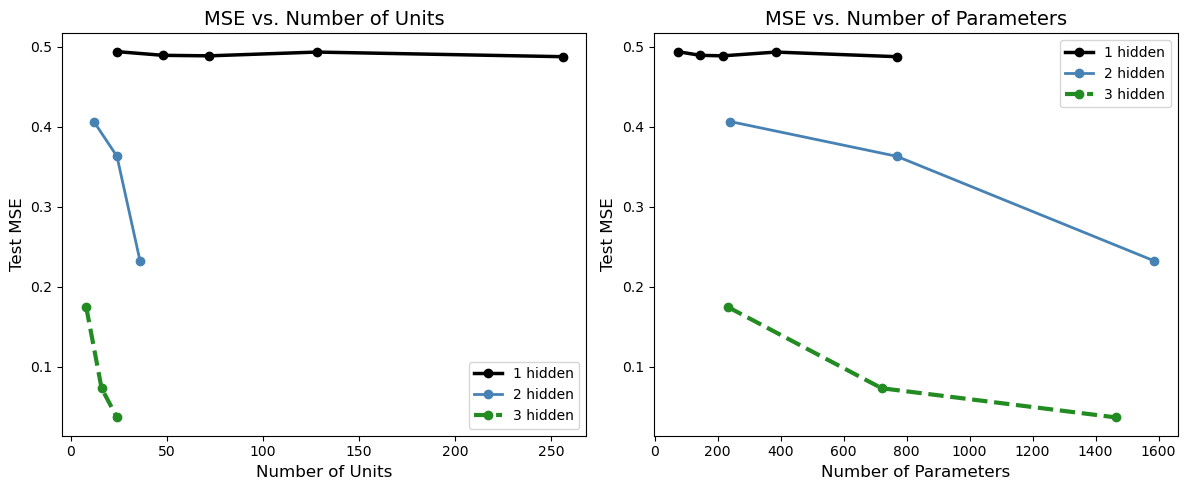

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df_results = pd.read_csv(r"C:\Users\91788\model_results.csv")

# Prepare data (renaming variables from rmse to mse)
mse_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}
units_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}
params_by_config = {'1 hidden': [], '2 hidden': [], '3 hidden': []}

for _, row in df_results.iterrows():
    config = row['config']
    units = row['units']
    params = row['params']
    mse = row['mse']
    mse_by_config[config].append(mse)
    units_by_config[config].append(units)
    params_by_config[config].append(params)

# Color and style settings
colors = {
    '1 hidden': 'black',
    '2 hidden': 'steelblue',
    '3 hidden': 'forestgreen'
}
linestyles = {
    '1 hidden': '-',
    '2 hidden': '-',
    '3 hidden': '--'
}
linewidths = {
    '1 hidden': 2.5,
    '2 hidden': 2,
    '3 hidden': 3
}

# Plot
plt.figure(figsize=(12, 5))

# MSE vs Number of Units
plt.subplot(1, 2, 1)
for config in mse_by_config:
    plt.plot(units_by_config[config], mse_by_config[config], marker='o',
             label=config, color=colors[config],
             linestyle=linestyles[config], linewidth=linewidths[config])
plt.xlabel("Number of Units", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("MSE vs. Number of Units", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.legend()

# MSE vs Number of Parameters
plt.subplot(1, 2, 2)
for config in mse_by_config:
    plt.plot(params_by_config[config], mse_by_config[config], marker='o',
             label=config, color=colors[config],
             linestyle=linestyles[config], linewidth=linewidths[config])
plt.xlabel("Number of Parameters", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("MSE vs. Number of Parameters", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### END
